# Handwritten Digit Recognition using MNIST Dataset

This notebook demonstrates building a Convolutional Neural Network (CNN) to recognize handwritten digits (0-9) from the MNIST dataset.

## Project Overview
- **Dataset**: MNIST (70,000 grayscale images of handwritten digits)
- **Model**: Convolutional Neural Network (CNN)
- **Framework**: TensorFlow/Keras
- **Goal**: Achieve high accuracy in digit classification

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.11.3


## 2. Load and Explore MNIST Dataset

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nPixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"Unique labels: {np.unique(y_train)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize Sample Images

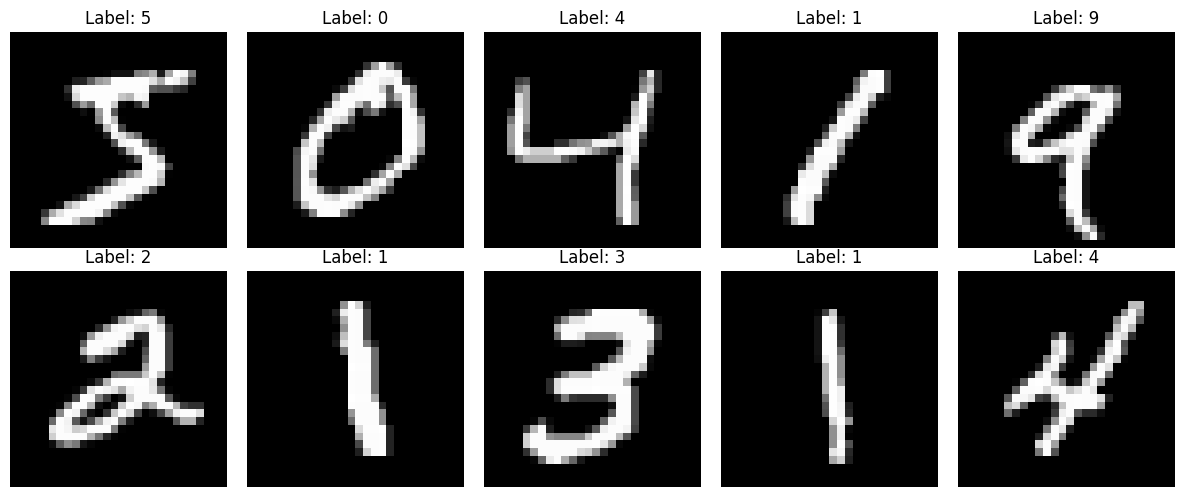

In [3]:
# Display sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [4]:
# Reshape data to add channel dimension (required for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print(f"Preprocessed training data shape: {X_train.shape}")
print(f"Preprocessed test data shape: {X_test.shape}")
print(f"One-hot encoded labels shape: {y_train_encoded.shape}")
print(f"Sample label encoding: {y_train[0]} -> {y_train_encoded[0]}")

Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed test data shape: (10000, 28, 28, 1)
One-hot encoded labels shape: (60000, 10)
Sample label encoding: 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 5. Build Convolutional Neural Network (CNN) Model

In [5]:
# Create CNN model
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Display model architecture
model.summary()

d:\AI_Project_Nitish\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Compile the Model

In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")

Model compiled successfully!


## 7. Train the Model

In [7]:
# Train the model
history = model.fit(
    X_train, y_train_encoded,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.9064 - loss: 0.2960 - val_accuracy: 0.9847 - val_loss: 0.0527
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.9064 - loss: 0.2960 - val_accuracy: 0.9847 - val_loss: 0.0527
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9819 - loss: 0.0584 - val_accuracy: 0.9905 - val_loss: 0.0322
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9819 - loss: 0.0584 - val_accuracy: 0.9905 - val_loss: 0.0322
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9903 - val_loss: 0.0342
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.9854 - loss: 0.0479 - 

## 8. Visualize Training History

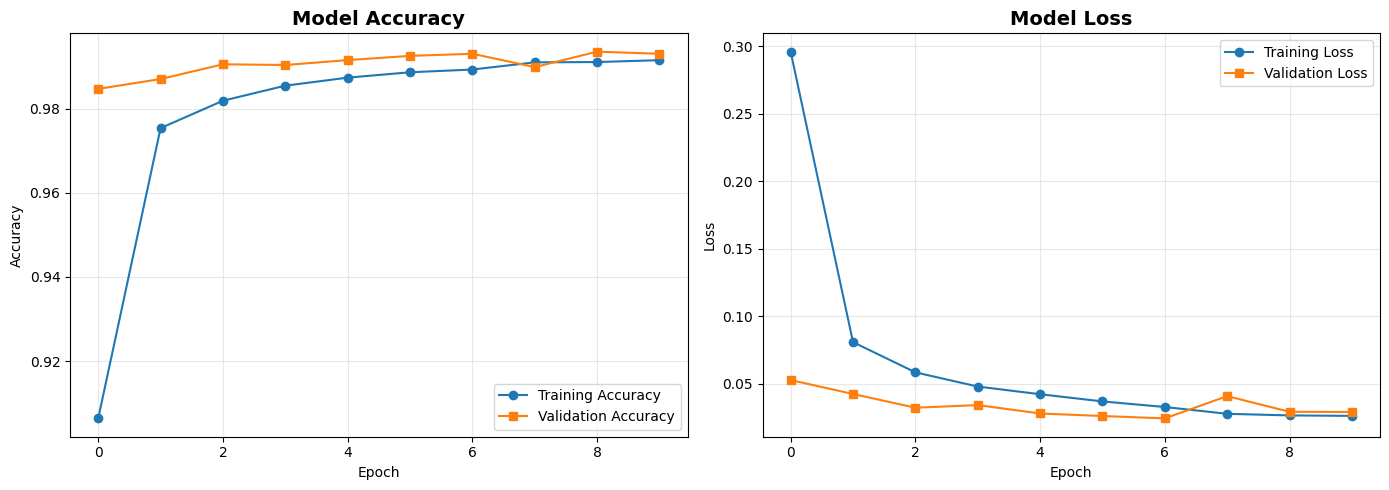

In [8]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss', marker='o')
ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Evaluate Model on Test Set

In [9]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Loss: 0.0253
Test Accuracy: 0.9919 (99.19%)


## 10. Make Predictions on Test Samples

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


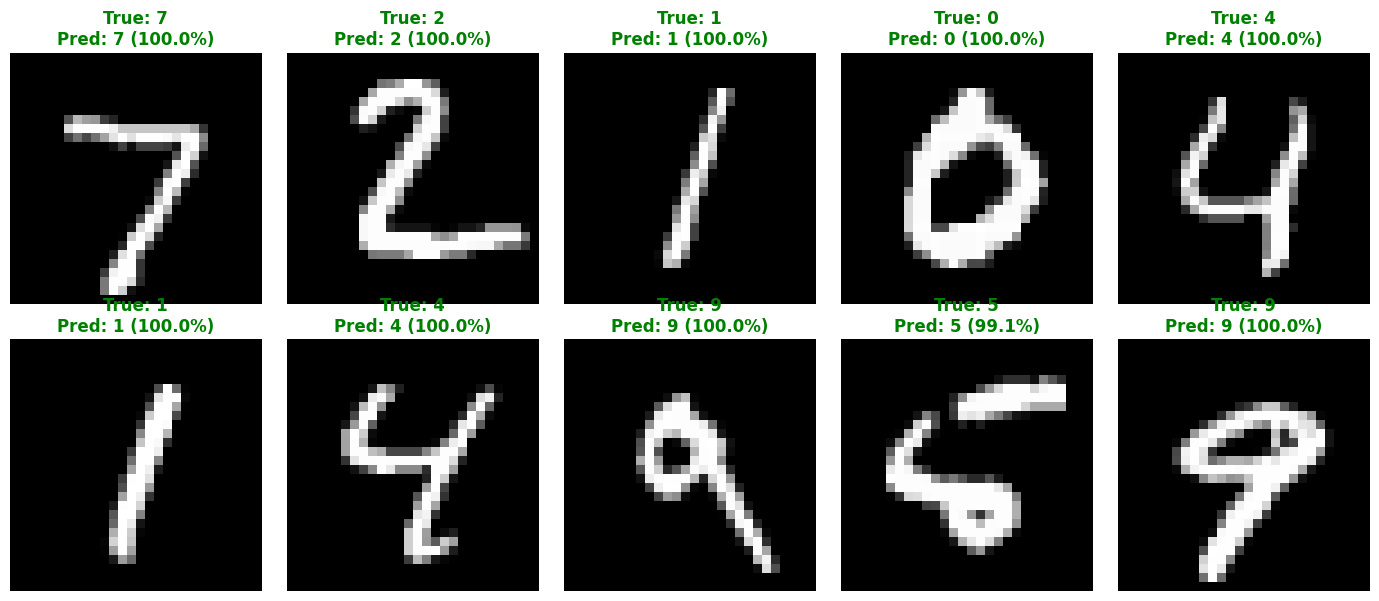

In [10]:
# Make predictions on test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    true_label = y_test[i]
    pred_label = predicted_labels[i]
    confidence = predictions[i][pred_label] * 100
    
    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)", 
                     color=color, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 11. Confusion Matrix

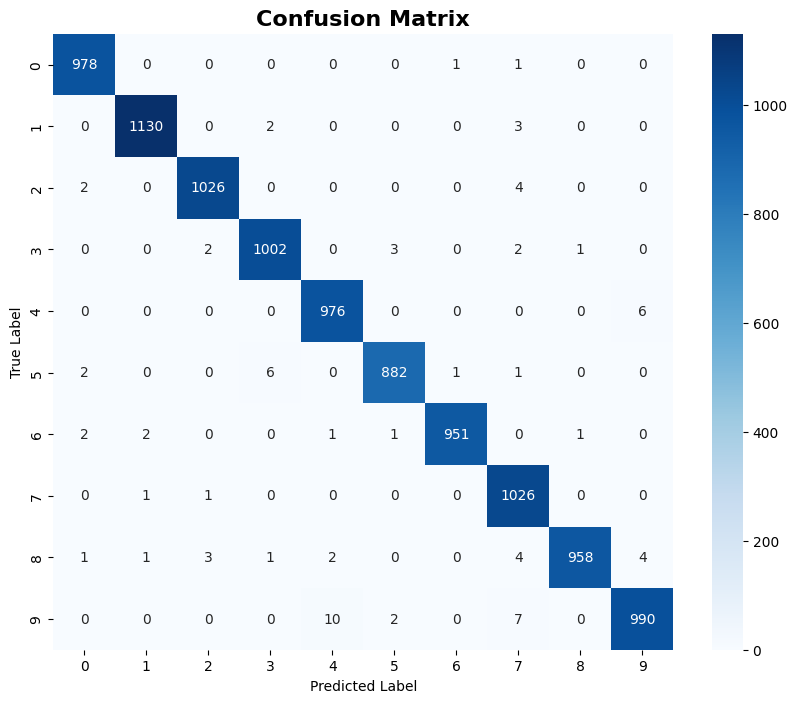


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_labels))

## 12. Save the Trained Model

In [12]:
# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model in Keras format
model.save('models/mnist_cnn_model.keras')
print("Model saved successfully as 'models/mnist_cnn_model.keras'")

# Also save in h5 format for compatibility
model.save('models/mnist_cnn_model.h5')
print("Model also saved as 'models/mnist_cnn_model.h5'")

Model saved successfully as 'models/mnist_cnn_model.keras'
Model also saved as 'models/mnist_cnn_model.h5'


## 13. Test Model Loading

In [13]:
# Load the saved model
loaded_model = keras.models.load_model('models/mnist_cnn_model.keras')

# Verify the loaded model works
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Loaded Model Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("Model loaded and verified successfully!")

Loaded Model Test Accuracy: 0.9919 (99.19%)
Model loaded and verified successfully!


## Summary

In this notebook, we:
1. Loaded the MNIST dataset
2. Preprocessed and normalized the data
3. Built a CNN model with multiple convolutional layers
4. Trained the model and achieved high accuracy
5. Evaluated the model on test data
6. Visualized predictions and confusion matrix
7. Saved the trained model for future use

**Next Step**: Use the saved model in a GUI application to draw and recognize digits in real-time!